In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
# data collection and processing
#Loading the dataset
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
# correlation between various columns if the data, while working on regression problems it is important to check the correlation as it tells which columns are related to which columns
#two types of correlation
#positive correlation - one variable will increases other will increase this is known as positive correlation in other words this is called as directly proportional
#negative correlation - one variable will increase the other will decrease as known as inversly proportional
correlation = gold_data.corr()

<ipython-input-10-46ca3ae47981>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


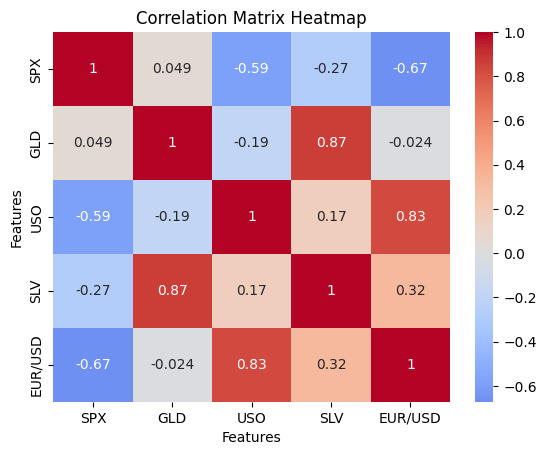

In [ ]:
#construct the heat map to understand correlation

# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
			center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()


In [ ]:
#correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-29-339f0ce84110>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'purple')


<Axes: xlabel='GLD', ylabel='Density'>

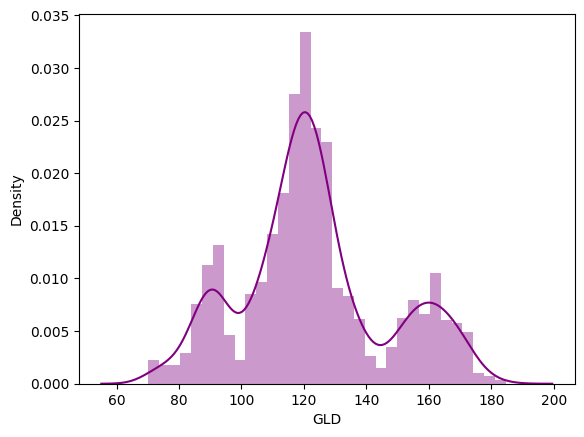

In [ ]:
#check the distribution for GLD prices
sns.distplot(gold_data['GLD'], color = 'purple')

In [ ]:
#Data Wrangling
#Data wrangling is one of the main steps We use in a data science project to gain insight and knowledge from the data. We see data through every aspect and try to fetch most of the information from the dataframe.
#We will first set the Date column as the index of the dataframe using the date as an index will add an advantage in plotting the data
# reset the index to date column
gold_data.set_index("Date", inplace=True)



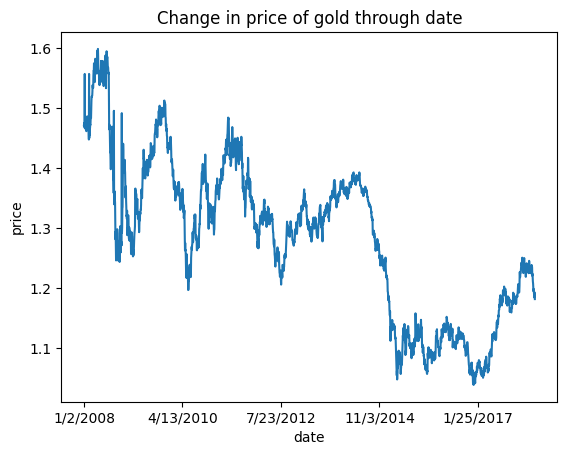

In [ ]:
#We will first observe the change in Gold price with each consecutive day throughout the year.
# plot price of gold for each increasing day
gold_data["EUR/USD"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()


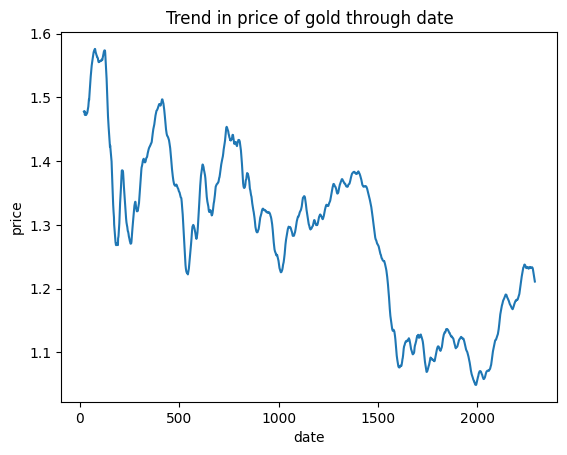

In [ ]:
#Trend in Gold Prices Using Moving Averages
#To visualize the trend in the data we have to apply a smoothing process on this line which looks very noisy. There are several ways to apply to smooth. In our project, we will take an average of 20 previous data points using the pandas rolling function. This is also known as the Moving Aver#age.
# apply rolling mean with window size of 3
gold_data["price_trend"] = gold_data["EUR/USD"]\
	.rolling(window=20).mean()

# reset the index to date column
gold_data.reset_index("Date", inplace=True)

# since we have used rolling method
# for 20 rows first 2 rows will be NAN
gold_data["price_trend"].loc[20:].plot()

# set title of the chart
plt.title("Trend in price of gold through date")

# set x_label of the plot
plt.xlabel("date")
plt.ylabel("price")
plt.show()


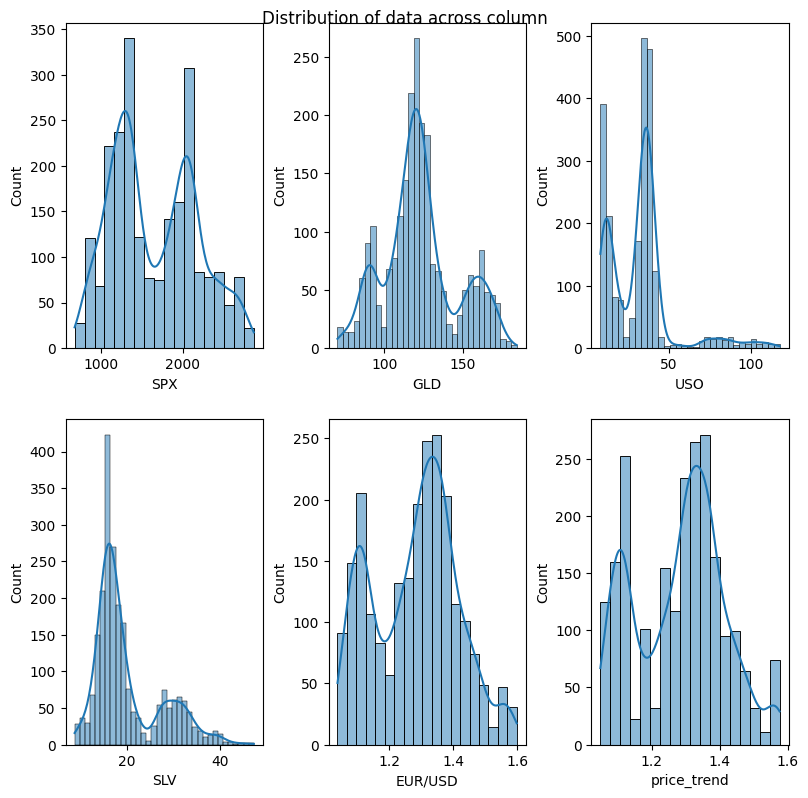

In [ ]:
#Distribution  of Columns
fig = plt.figure(figsize=(8, 8))

# suptitle of the graph
fig.suptitle('Distribution of data across column')
temp = gold_data.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
	plt.subplot(2, 3, i+1)
	sns.histplot(data=gold_data, x=item, kde=True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()


In [ ]:
# skewness along the index axis
print(gold_data.skew(axis=0, skipna=True))


SPX            0.300362
GLD            0.334138
USO            1.699331
SLV            1.153641
EUR/USD       -0.005292
price_trend   -0.029588
dtype: float64


<ipython-input-27-723efe05af1a>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(gold_data.skew(axis=0, skipna=True))


In [ ]:
#Column USO has the highest skewness of 0.98, so here we will apply square root transformation on this column to reduce its skewness to 0. We can use different transformation functions to lower the skewness some are logarithmic transformation, inverse transformation, etc.
# apply saquare root transformation
# on the skewed dataset
gold_data["USO"] = gold_data["USO"]\
	.apply(lambda x: np.sqrt(x))


Handling Outliers :

Outliers can have a very bad effect on our model like in linear regression if a data point is an outlier then it can add a very large mean square error. Removing outliers is a good process in EDA. Some models like Decisiontree and ensemble methods like RandomForests are not that much by outliers. However, it is always a good practice to handle the outlier.

Plotting Boxplot to Visualize the Outliers
Boxplots are very useful in plotting the spread and skewness of the data, it is also useful in plotting the individual’s outlier data points, they consist of the box which represents points in the range of 25% to 75% quantiles. While the line in the middle of the box represents the median and the whisker at the end of the box shows the range of below 25 % and 75% excluding outliers.

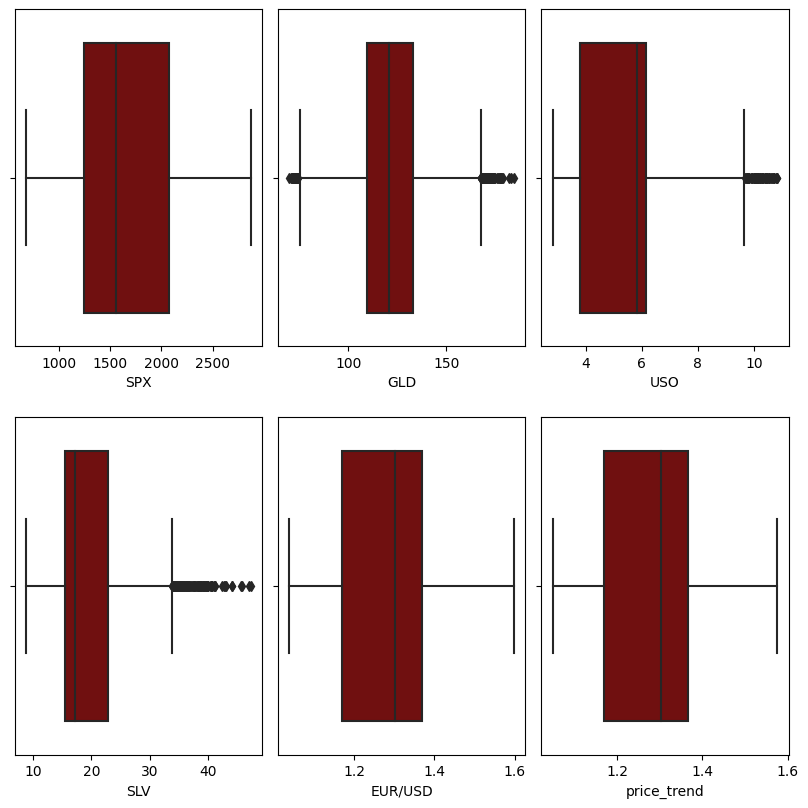

In [ ]:
#Handling Outliers
fig = plt.figure(figsize=(8, 8))
temp = gold_data.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
	plt.subplot(2, 3, i+1)
	sns.boxplot(data=gold_data, x=item, color='maroon')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()


In [ ]:
#It can be seen clearly that the column ‘USO’ has outliers present in the column, so we create a function to normalize the outlier present in the column.
def outlier_removal(column):
	# Capping the outlier rows with Percentiles
	upper_limit = column.quantile(.95)
	# set upper limit to 95percentile
	lower_limit = column.quantile(.05)
	# set lower limit to 5 percentile
	column.loc[(column > upper_limit)] = upper_limit
	column.loc[(column < lower_limit)] = lower_limit
	return column


In [ ]:
# Normalize outliers in columns except Date

gold_data[['SPX', 'GLD', 'USO', 'EUR/USD']] = \
	gold_data[['SPX', 'GLD', 'USO', 'EUR/USD']].apply(outlier_removal)


Scaling the Data
Before we train the model on our data we should perform scaling on our data to normalize. After scaling the data our mean of each column becomes zero and their standard deviation becomes 1. It is also called z-score normalization since we subtract the mean of the column from each element and divide it by the standard deviation of the column. It brings all the columns to the same scale and directly comparable with one another.

In [ ]:
#train_test_split
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler on the training dataset
scaler.fit(X_train)

# Transform the training dataset
# using the StandardScaler
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


In [ ]:
#Splitting X and Y into training and testing variables :
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [ ]:
#Model Training: Random Forest Regressor :
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#Model Evaluation :
test_data_prediction = regressor.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9887080227634312


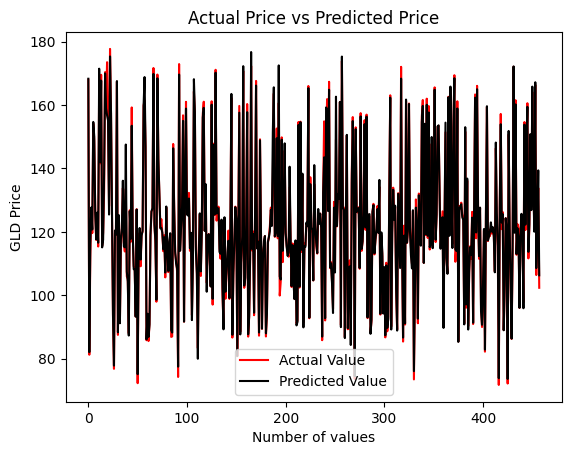

In [ ]:
#Comparing the Actual Values and the Predicted Values :
#Converting the values of Y_test into a list
#Now, plotting values of actual prices, versus the predicted prices to know, how close ou predictions were to the actual prices :
Y_test = list(Y_test)
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()